# 作業1


##### 練習將DHT22接於GPIO 27接腳，並且更改軟體的接腳設定值，重新執行範例程式，驗證在不同的接腳上安裝DHT22，程式一樣可以正確地讀出數值。

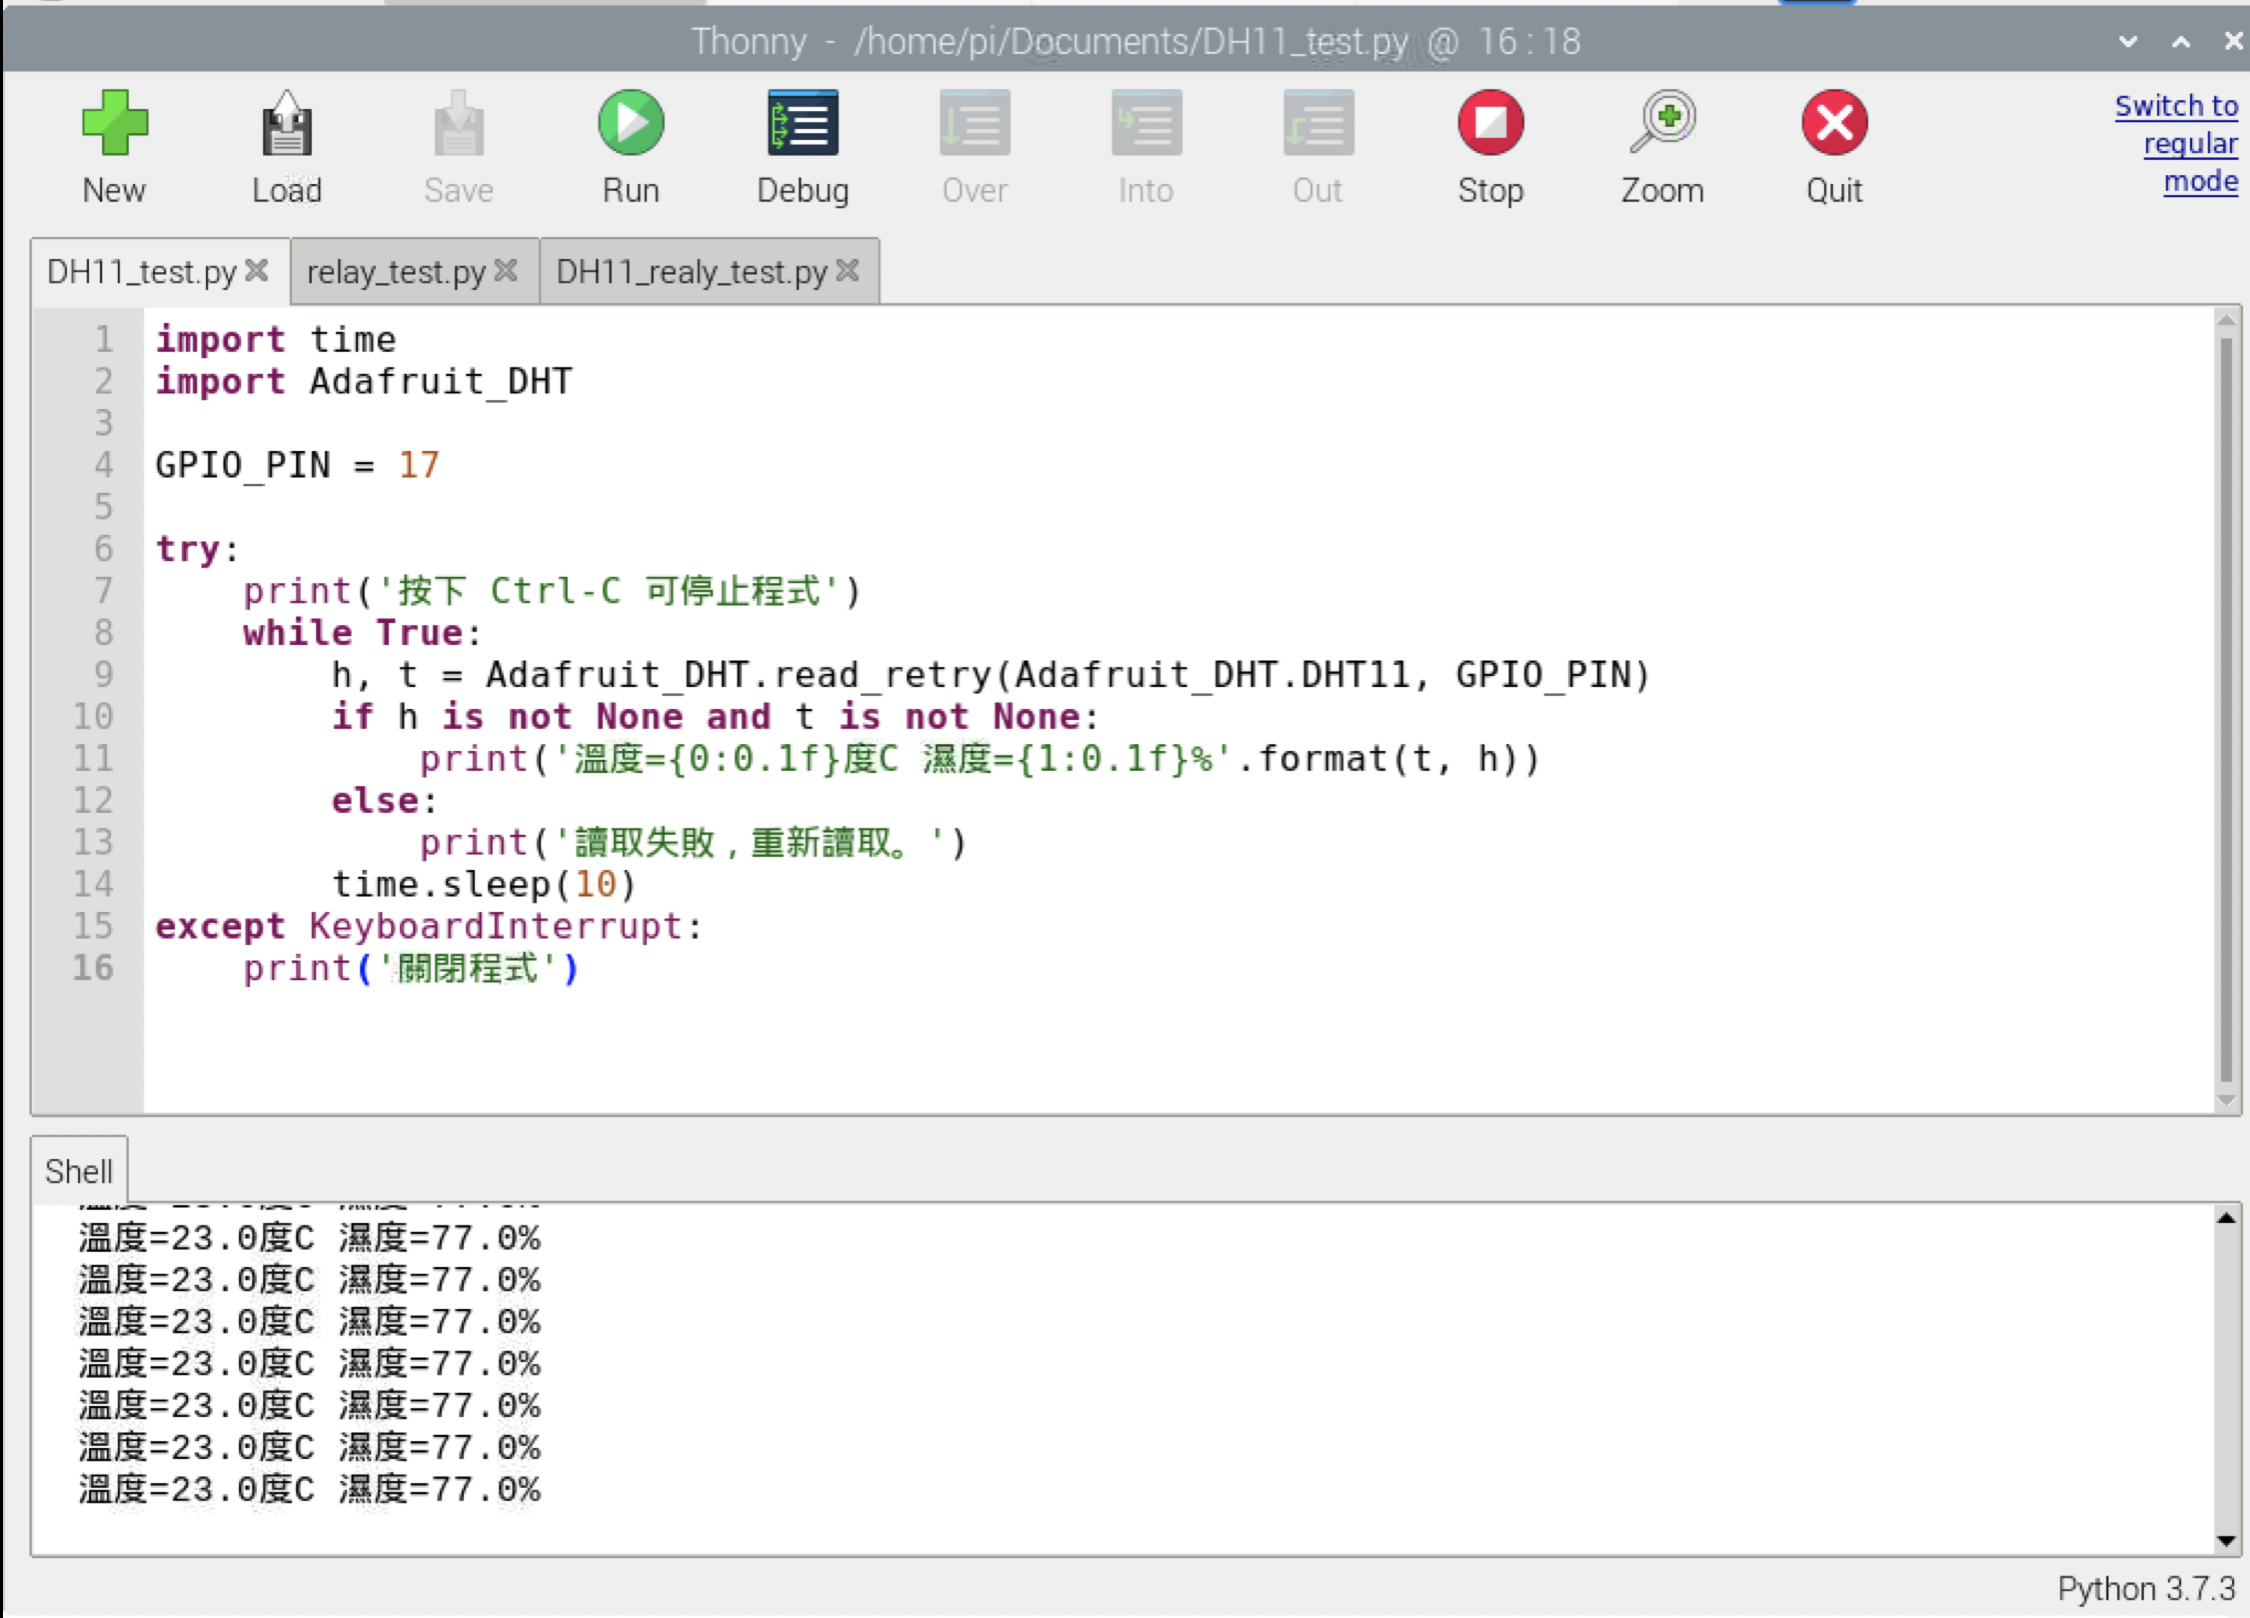

In [1]:
# 以DH11代替
from IPython.display import Image
Image("/Users/lochien-min/Desktop/截圖 2021-03-30 下午2.42.03.png",width=400,height=400)

# 作業2


#### 觀察RPi.GPIO的程式碼，與GPIOZero程式碼對於繼電器控制上寫法的不同，如果我們要設定GPIO 26, 19, 13, 6四個接腳控制一個四路繼電器，練習實作一個GPIOZero四路繼電器的控制程式。

In [ ]:
# 只單路繼電器代替
# RPi.GPIO
import RPi.GPIO as GPIO
from time import sleep

relay_pin = 21

GPIO.setmode(GPIO.BCM)
GPIO.setup(relay_pin, GPIO.OUT)
GPIO.output(relay_pin, 1)

try:
    while True:
        GPIO.output(relay_pin, 0)
        sleep(5)
        GPIO.output(relay_pin, 1)
        sleep(5)
except KeyboardInterrupt:
    pass
    GPIO.cleanup()

In [ ]:
# GPIOZero
import sys
import time

import gpiozero

RELAY_PIN = 26

# 開始時設定動作狀態為假(GPIO為0, active_high=False) 
# 初始狀態值設定為關閉: (initial_value=False)

relay = gpiozero.OutputDevice(RELAY_PIN, active_high=False, initial_value=False)

def set_relay(status):
    if status:
        print("繼電器導通")
        relay.on()
    else:
        print("繼電器斷路")
        relay.off()

def toggle_relay():
    print("切換繼電器狀態, 開變關, 關變開")
    relay.toggle()

def main_loop():
# 程式開始, 設定繼電器狀態為假 (GPIO輸出0)
    set_relay(False)
    while 1:
# 切換繼電器狀態
        toggle_relay()
# 等待一秒鐘時間 
        time.sleep(1)

if __name__ == "__main__":
    try:
        main_loop()
    except KeyboardInterrupt:
# 如果按了鍵盤，執行底下的程式片段
# 繼電器關閉
        set_relay(False)
        print("\n程式結束執行\n")
# 跳出程式，程式執行結束
        sys.exit(0)

# 作業3


#### 將作業1與作業2結合，設定程式在溫度10度以下，打開GPIO26，溫度10度以上到20度之間，控制GPIO19，溫度20度到30度之間，控制GPIO13，溫度在30度以上，控制GPIO6，達成在不同的溫度區間時，控制不同的繼電器的需求。

In [ ]:
# 用單路繼電器與DH11代替 如果濕度達70 開燈

import Adafruit_DHT
import RPi.GPIO as GPIO
import time

GPIO_PIN = 17

relay_pin = 21

GPIO.setmode(GPIO.BCM)
GPIO.setup(relay_pin, GPIO.OUT)
GPIO.output(relay_pin, 1)

try:
    print('按下 Ctrl-C 可停止程式')
    while True:
        h, t = Adafruit_DHT.read_retry(Adafruit_DHT.DHT11, GPIO_PIN)
        if h is not None and t is not None:
            print('溫度={0:0.1f}度C 濕度={1:0.1f}%'.format(t, h))
            if h>70:
                print("警示 濕度過高")
                GPIO.output(relay_pin, 1)
            else:
                GPIO.output(relay_pin, 0)
        else:
            print('讀取失敗，重新讀取。')
        time.sleep(5)
except KeyboardInterrupt:
    print('關閉程式')

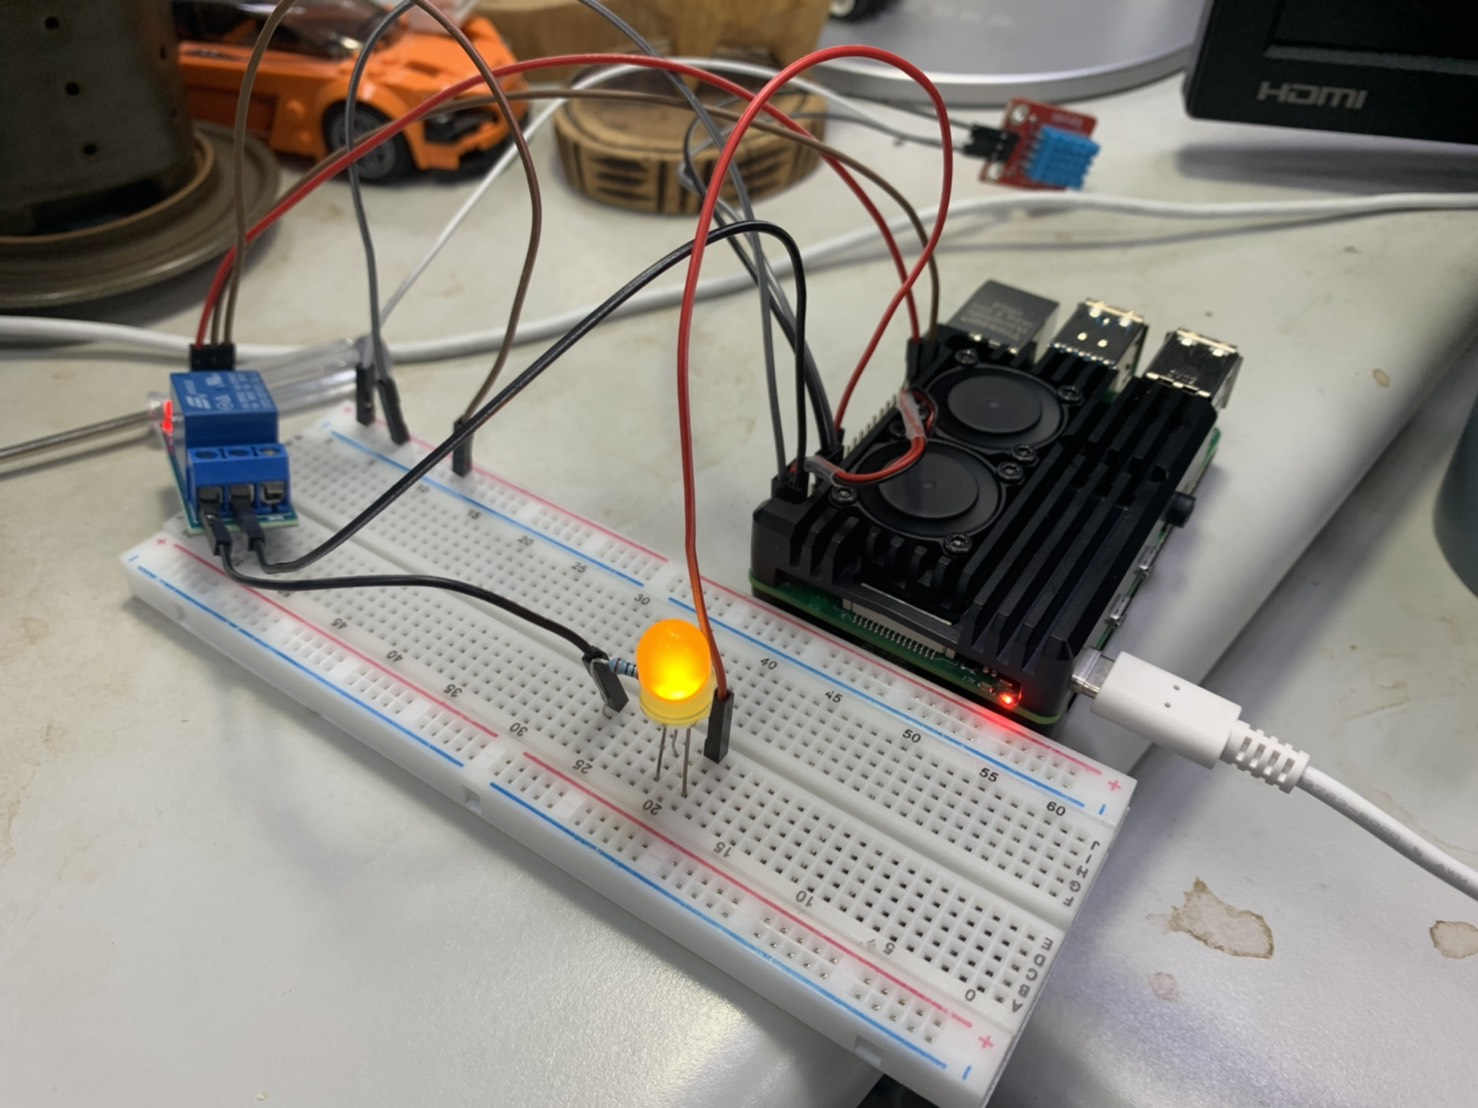

In [4]:
Image("/Users/lochien-min/Downloads/S__10854402.jpg",width=400,height=400)